<a href="https://colab.research.google.com/github/codelspak/Codelion_weekly_projects/blob/main/WK26_W7_Mini_project__Kaggle_Regression_predicting_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 문제 설명
'Country'
'Year'
'Status'
'Life expectancy '
'Adult Mortality'
'infant deaths'
'Alcohol'
'percentage expenditure'
'Hepatitis B'
'Measles '
' BMI '
'under-five deaths '
'Polio'
'Total expenditure'
'Diphtheria '
' HIV/AIDS'
'GDP'
'Population'
' thinness  1-19 years'
' thinness 5-9 years'
'Income composition of resources'
'Schooling'

1) Country : 나라명<br>
2) Year : 조사 연도 (2000 ~ 2015)<br>
3) Status : 국가 개발 정도<br>
4) Life expectancy : 기대 수명 (label_name으로 사용 예정)<br>
5) Adult Mortality : 성인 사망자수(15세 - 60세 사이 1000명 당 사망률)<br>
6) infant deaths : 신생아 사망자수(1000명 당)<br>
7) Alcohol : 인당 순수 알코올 소비량<br>
8) percentage expenditure : GDP 대비 의료비 지출(%)
<br>9) Hepatitis B : 1세 아동 B형 간염 예방 접종률(%)
<br>10) Measles : 1000명 당 홍역 감염 보고 수
<br>11) BMI : 국민 BMI 평균
<br>12) under-five deaths : 1000명 당 5세 이하 사망자 수
<br>13) Polio : 1세 아동 소아 마비 예방 접종률(%)
<br>14) Total expenditure : 총 정부 지출 대비 의료 정부 지출 비율(%)
<br>15) Diphtheria : 1세 아동 디프테리아 독소 및 백일해 예방 접종률(%)
<br>16) HIV/AIDS : 1000명 당 에이즈로 인한 사망자 수
<br>17) GDP : 인당 GDP (단위: USD)
<br>18) Population : 인구 수
<br>19) thinness 10-19 years : 10-19세 청소년 중 마른 비율(%)
<br>20) thinness 5-9 years : 5-9세 유아 중 마른 비율(%)
<br>21) Income composition of resources : 소득 대비 HDI(인간 개발 지수)
<br>22) Schooling : 학교 재학년수

# 2. 라이브러리, 데이터셋 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('/content/drive/MyDrive/Codelion_weekly assignments/Life Expectancy Data.csv')
data.shape

(2938, 22)

데이터 중 life expectancy가 없는 10개 데이터는 버리고 가기로, 미팅 결과 합의<br>
따라서 데이터 탐색 전에 미리 삭제해주고 시작하겠음

In [3]:
delete_index = data[data['Life expectancy '].isnull()].index.tolist()
data = data.drop(delete_index, axis = 0)
data.shape

(2928, 22)

In [4]:
data['Life expectancy '].isnull().sum()

0

# 3. 데이터 기초정보 확인

In [5]:
original_cols = data.columns.values.tolist()
print(original_cols)

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [6]:
mycols = ['country', 'year', 'nationstatus', 'lifeexpectancy', 'adult_mortality','infant_deaths',
          'alcoholconsumption', 'p_expenditure_pergdp', 'hepb_vac_rates','measles', 'bmi', 
          'under_five_deaths', 'polio', 'p_expenditure',
          'diphtheria', 'under_four_hiv/aids', 'gdp', 'population',
          'thinness_10to19', 'thinness_5to9', 'hd_index_income', 'schooling_years']

In [7]:
data.shape

(2928, 22)

In [8]:
data.columns = mycols
display(data.head(3))
display(data.sample(3))

country  year nationstatus  lifeexpectancy  adult_mortality  \
0  Afghanistan  2015   Developing            65.0            263.0   
1  Afghanistan  2014   Developing            59.9            271.0   
2  Afghanistan  2013   Developing            59.9            268.0   

   infant_deaths  alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates  \
0             62                0.01             71.279624            65.0   
1             64                0.01             73.523582            62.0   
2             66                0.01             73.219243            64.0   

   measles  ...  polio  p_expenditure  diphtheria  under_four_hiv/aids  \
0     1154  ...    6.0           8.16        65.0                  0.1   
1      492  ...   58.0           8.18        62.0                  0.1   
2      430  ...   62.0           8.13        64.0                  0.1   

          gdp  population  thinness_10to19  thinness_5to9  hd_index_income  \
0  584.259210  33736494.0             17.2           17.3            0.479   
1  612.696514    327582.0             17.5           17.5            0.476   
2  631.744976  31731688.0             17.7           17.7            0.470   

   schooling_years  
0             10.1  
1             10.0  
2              9.9  

[3 rows x 22 columns]

country  year nationstatus  lifeexpectancy  adult_mortality  \
1550          Luxembourg  2003    Developed            78.6             92.0   
2140  Russian Federation  2010   Developing            68.4            256.0   
1124               Haiti  2013   Developing            62.7            253.0   

      infant_deaths  alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates  \
1550              0               12.61          10111.389280            95.0   
2140             15               11.05            162.808805            97.0   
1124             14                5.68              4.989712            68.0   

      measles  ...  polio  p_expenditure  diphtheria  under_four_hiv/aids  \
1550        1  ...   99.0           7.67        98.0                  0.1   
2140      129  ...   98.0           6.83        97.0                  0.2   
1124        0  ...   67.0           8.10        68.0                  0.5   

               gdp   population  thinness_10to19  thinness_5to9  \
1550  65445.885300      45163.0              1.0            0.9   
2140   1674.987710  142849449.0              2.3            2.5   
1124     81.265673    1431776.0              3.9            3.9   

      hd_index_income  schooling_years  
1550            0.865             13.6  
2140            0.773             13.7  
1124            0.483              9.1  

[3 rows x 22 columns]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               2928 non-null   object 
 1   year                  2928 non-null   int64  
 2   nationstatus          2928 non-null   object 
 3   lifeexpectancy        2928 non-null   float64
 4   adult_mortality       2928 non-null   float64
 5   infant_deaths         2928 non-null   int64  
 6   alcoholconsumption    2735 non-null   float64
 7   p_expenditure_pergdp  2928 non-null   float64
 8   hepb_vac_rates        2375 non-null   float64
 9   measles               2928 non-null   int64  
 10  bmi                   2896 non-null   float64
 11  under_five_deaths     2928 non-null   int64  
 12  polio                 2909 non-null   float64
 13  p_expenditure         2702 non-null   float64
 14  diphtheria            2909 non-null   float64
 15  under_four_hiv/aids  

국가명 등이 있어서 그런가? 데이터 shape에 비해 메모리 사용량이 상당히 큰 것 같음<br>
downcast 써보면 어떨까?<br>

|    | Data type   | Description                                                          |
|---:|:------------|:---------------------------------------------------------------------|
|  0 | bool        | Boolean (True or False) stored as a byte                             |
|  1 | int         | Platform integer (normally either int32 or int64)                    |
|  2 | int8        | Byte (-128 to 127)                                                   |
|  3 | int16       | Integer (-32768 to 32767)                                            |
|  4 | int32       | Integer (-2147483648 to 2147483647)                                  |
|  5 | int64       | Integer (9223372036854775808 to 9223372036854775807)                 |
|  6 | uint8       | Unsigned integer (0 to 255)                                          |
|  7 | uint16      | Unsigned integer (0 to 65535)                                        |
|  8 | uint32      | Unsigned integer (0 to 4294967295)                                   |
|  9 | uint64      | Unsigned integer (0 to 18446744073709551615)                         |
| 10 | float       | Shorthand for float64.                                               |
| 11 | float16     | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa    |
| 12 | float32     | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa  |
| 13 | float64     | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa |
| 14 | complex     | Shorthand for complex128.                                            |
| 15 | complex64   | Complex number, represented by two 32-bit floats                     |
| 16 | complex128  | Complex number, represented by two 64-bit floats                     |

In [10]:
icols = data.select_dtypes('integer').columns.tolist()
fcols = data.select_dtypes('float').columns.tolist()

In [11]:
display(data[icols].min())
print("-"*50)
display(data[fcols].min())

year                 2000
infant_deaths           0
measles                 0
under_five_deaths       0
dtype: int64

--------------------------------------------------


lifeexpectancy          36.30000
adult_mortality          1.00000
alcoholconsumption       0.01000
p_expenditure_pergdp     0.00000
hepb_vac_rates           1.00000
bmi                      1.00000
polio                    3.00000
p_expenditure            0.37000
diphtheria               2.00000
under_four_hiv/aids      0.10000
gdp                      1.68135
population              34.00000
thinness_10to19          0.10000
thinness_5to9            0.10000
hd_index_income          0.00000
schooling_years          0.00000
dtype: float64

In [12]:
# 과학적 표기법 대신 소수점 5자리까지 나타낸다.
pd.options.display.float_format = '{:.5f}'.format

display(data[icols].max())
print("-"*50)
display(data[fcols].max())

year                   2015
infant_deaths          1800
measles              212183
under_five_deaths      2500
dtype: int64

--------------------------------------------------


lifeexpectancy                 89.00000
adult_mortality               723.00000
alcoholconsumption             17.87000
p_expenditure_pergdp        19479.91161
hepb_vac_rates                 99.00000
bmi                            77.60000
polio                          99.00000
p_expenditure                  17.60000
diphtheria                     99.00000
under_four_hiv/aids            50.60000
gdp                        119172.74180
population             1293859294.00000
thinness_10to19                27.70000
thinness_5to9                  28.60000
hd_index_income                 0.94800
schooling_years                20.70000
dtype: float64

In [13]:
data[icols] = data[icols].apply(lambda int_features : pd.to_numeric(int_features, downcast = 'unsigned'))
data[fcols] = data[fcols].apply(lambda float_features : pd.to_numeric(float_features, downcast = 'float'))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               2928 non-null   object 
 1   year                  2928 non-null   uint16 
 2   nationstatus          2928 non-null   object 
 3   lifeexpectancy        2928 non-null   float32
 4   adult_mortality       2928 non-null   float32
 5   infant_deaths         2928 non-null   uint16 
 6   alcoholconsumption    2735 non-null   float32
 7   p_expenditure_pergdp  2928 non-null   float32
 8   hepb_vac_rates        2375 non-null   float32
 9   measles               2928 non-null   uint32 
 10  bmi                   2896 non-null   float32
 11  under_five_deaths     2928 non-null   uint16 
 12  polio                 2909 non-null   float32
 13  p_expenditure         2702 non-null   float32
 14  diphtheria            2909 non-null   float32
 15  under_four_hiv/aids  

downcast 이전 <br>
dtypes: float64(16), int64(4), object(2)
<br>memory usage: 526.1+ KB
<br>
<br>downcast 이후<br>
dtypes: float32(16), object(2), uint16(3), uint32(1)
<br>memory usage: 280.2+ KB

기술통계 확인해줌

In [14]:
display(data.describe().loc[:,'year':'under_five_deaths'])
display(data.describe().loc[:,'polio':])


year  lifeexpectancy  adult_mortality  infant_deaths  \
count 2928.00000      2928.00000       2928.00000     2928.00000   
mean  2007.50000        69.22493        164.79645       30.40745   
std      4.61056         9.52387        124.29208      118.11445   
min   2000.00000        36.30000          1.00000        0.00000   
25%   2003.75000        63.10000         74.00000        0.00000   
50%   2007.50000        72.10000        144.00000        3.00000   
75%   2011.25000        75.70000        228.00000       22.00000   
max   2015.00000        89.00000        723.00000     1800.00000   

       alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates      measles  \
count          2735.00000            2928.00000      2375.00000   2928.00000   
mean              4.61486             740.32123        80.96084   2427.85587   
std               4.05075            1990.93054        25.01834  11485.97094   
min               0.01000               0.00000         1.00000      0.00000   
25%               0.90500               4.85396        77.00000      0.00000   
50%               3.77000              65.61145        92.00000     17.00000   
75%               7.71500             442.61431        97.00000    362.25000   
max              17.87000           19479.91211        99.00000 212183.00000   

             bmi  under_five_deaths  
count 2896.00000         2928.00000  
mean    38.23539           42.17930  
std     19.95959          160.70055  
min      1.00000            0.00000  
25%     19.30000            0.00000  
50%     43.35000            4.00000  
75%     56.10000           28.00000  
max     77.60000         2500.00000

polio  p_expenditure  diphtheria  under_four_hiv/aids          gdp  \
count 2909.00000     2702.00000  2909.00000           2928.00000   2485.00000   
mean    82.54830        5.93016    82.32142              1.74771   7494.21094   
std     23.41667        2.48327    23.70664              5.08554  14282.25098   
min      3.00000        0.37000     2.00000              0.10000      1.68135   
25%     78.00000        4.26000    78.00000              0.10000    463.85263   
50%     93.00000        5.75000    93.00000              0.10000   1764.97388   
75%     97.00000        7.49000    97.00000              0.80000   5932.89990   
max     99.00000       17.60000    99.00000             50.60000 119172.74219   

            population  thinness_10to19  thinness_5to9  hd_index_income  \
count       2284.00000       2896.00000     2896.00000       2768.00000   
mean    12764542.00000          4.85062        4.88142          0.62742   
std     61037648.00000          4.42083        4.50961          0.21098   
min           34.00000          0.10000        0.10000          0.00000   
25%       196673.75000          1.60000        1.57500          0.49300   
50%      1391756.50000          3.30000        3.40000          0.67700   
75%      7426745.50000          7.20000        7.20000          0.77925   
max   1293859328.00000         27.70000       28.60000          0.94800   

       schooling_years  
count       2768.00000  
mean          11.99964  
std            3.34644  
min            0.00000  
25%           10.10000  
50%           12.30000  
75%           14.30000  
max           20.70000

위 기술통계로부터 얻을 수 있는 포인트는 세 가지 정도가 있음. <br>
1. 이상치에 가까운, 편향된 분포를 갖는 features 도출  <br>
    - 0 ~ 25% - hepb_vac_rates / polio / diphtheria / schooling years 
    - 75% ~ 100% : adult_mortality / infant_deaths / p_expenditure_pergdp / measles / under_five_deaths / gdp / population 
    <br>
2.  p_expenditure_pergdp : GDP 대비 의료비 지출(%) - 퍼센트 비율인데 75% = 441.534144....? 물론 예상치 못한 이유로 GDP 이상으로 지출을 할 수도 있겠지, 라고 생각을 해보긴 했는데. 그래도 400%, 19500%는 뭔가 에러 혹은 이상치 영역이 맞는 듯<br>
3. measles : 홍역, 인구 1000명당 보고된 환자 수 - 홍역은 재발하는 병이 아니라는데, 1000 이상의 값이 가지는 의미는? <br>
[삼성서울병원 홍역 질병 정보](http://www.samsunghospital.com/home/healthInfo/content/contenView.do?CONT_SRC=CMS&CONT_SRC_ID=09a4727a8000f380&CONT_CLS_CD=001020001013&CONT_ID=1639)


In [15]:
data.describe(include = ['O'])

country nationstatus
count          2928         2928
unique          183            2
top     Afghanistan   Developing
freq             16         2416

데이터 유형(연속형/범주형) 및 분포 확인해줌

In [16]:
data.nunique()

country                  183
year                      16
nationstatus               2
lifeexpectancy           362
adult_mortality          425
infant_deaths            209
alcoholconsumption      1076
p_expenditure_pergdp    2323
hepb_vac_rates            87
measles                  958
bmi                      602
under_five_deaths        252
polio                     73
p_expenditure            816
diphtheria                81
under_four_hiv/aids      200
gdp                     2485
population              2277
thinness_10to19          200
thinness_5to9            207
hd_index_income          625
schooling_years          173
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f992ec167d0>,
      dtype=object)

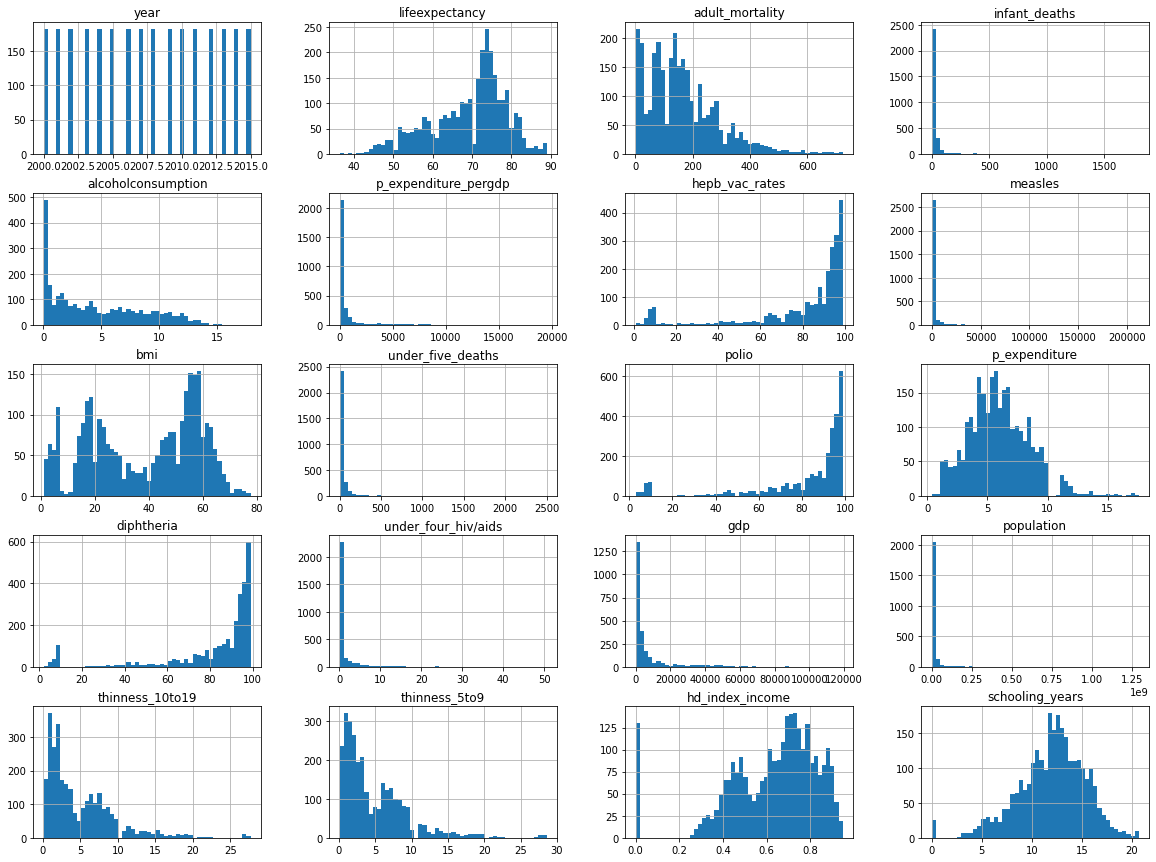

In [17]:
data.hist(figsize = (20,15), bins = 50)

중복값 / 결측치

In [18]:
data.duplicated().sum()

0

In [19]:
data.isnull().sum()

country                   0
year                      0
nationstatus              0
lifeexpectancy            0
adult_mortality           0
infant_deaths             0
alcoholconsumption      193
p_expenditure_pergdp      0
hepb_vac_rates          553
measles                   0
bmi                      32
under_five_deaths         0
polio                    19
p_expenditure           226
diphtheria               19
under_four_hiv/aids       0
gdp                     443
population              644
thinness_10to19          32
thinness_5to9            32
hd_index_income         160
schooling_years         160
dtype: int64

In [20]:
data.isnull().sum()[data.isnull().sum()>0]

alcoholconsumption    193
hepb_vac_rates        553
bmi                    32
polio                  19
p_expenditure         226
diphtheria             19
gdp                   443
population            644
thinness_10to19        32
thinness_5to9          32
hd_index_income       160
schooling_years       160
dtype: int64

바로 결측치 처리를 해주기보다는, Part4-5에서 데이터EDA, Feature engineering을 하며 필요없는 데이터는 버리고 중요한 feature에 대해서만 결측치 처리를 해주기로 함!

# 4. EDA, 전처리 및 시각화

## Case1. 편향된 분포 그대로 사용할 경우


### 상관관계 heatmap (결측치 등 전처리 전) <br> 
[heatmap - triu(mask) 관련, np.ones* 함수 정리](https://jimmy-ai.tistory.com/84)

In [21]:
corr = data.corr()

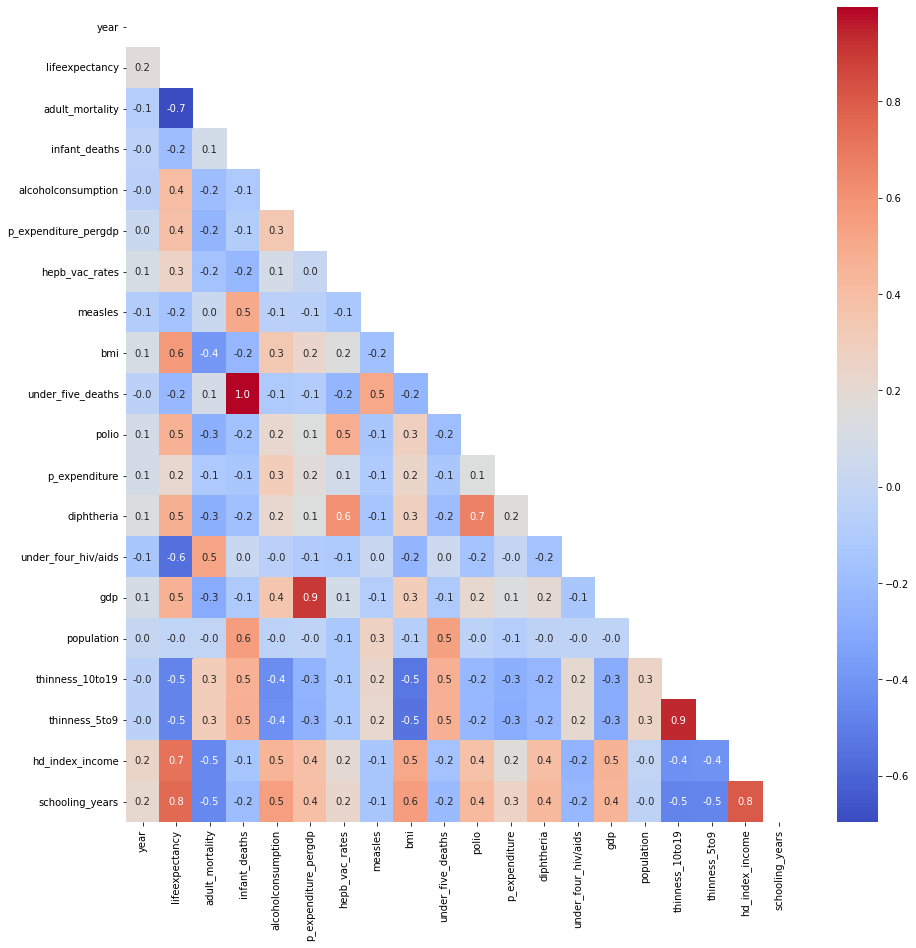

In [22]:
# heatmap
plt.figure(figsize = (15,15))
mask_triu = np.triu(np.ones_like(corr, dtype = bool))
_ = sns.heatmap(corr, mask = mask_triu,
                cmap = 'coolwarm',
                annot = True, fmt = ',.1f', )

기대수명 lifeexpectancy와 다른 변수 간 관계를 중심으로 히트맵 그래프를 살펴보았을 떄, <br>
1. 소아보다는 성인 관련된 feature들이 기대수명과 더 함께 움직이는 경향<br>
    - 소아 : infant_deaths, under_five_deaths <br>(이 때 polio, thinness_5to9은 생존에 관한 컬럼으로, 향후 성인들의 건강 status와 연결되는 부분이 많으므로, 상대적으로 많은 상관관계를 갖는 걸로 보임)<br>(under_four_hiv/aids 또한, 그 나이 대의 아이들이 에이즈에 걸리는 건 부모의 영향이 크다고 봄. 따라서 기대수명과 음의 상관관계를 갖는 게 이해감)<br>
2. adult_mortality : 1000명 당 사망자 수 증가 시, 그 나이가 기대수명에 영향을 미치므로 중요한 feature로 작용할 것 <br>
3. 건강상태에 영향을 미치는 백신 접종률 등의 feature는 상관 계수가 높음<br>
    - 백신 접종 : hepb_vac_rates, polio, diphteria
    - 질병 확진 이력 : measles<br>(홍역이 상관관계가 낮은 건, 위 기술통계 파트에서 확인한 이상치 (75% 이상 구간에 대한) 영향이 아닐까 예상<br>
    - 의사들이 좋아하는 feature : alcoholconsumption, bmi<br>
4. 사회/경제적 요소들 : 일부 중복이 존재하는 듯
    - p_expenditure_pergdp : gdp 대비 보건 예산 지출 비용 비율
    - p_expenditure : 정부 지출 대비 보건 예산 지출 비용 비율
    - gdp -> 왜 경제 관련 세 개 지표 중, 얘가 가장 상관 관계가 클까?
    - population
    - schooling_years
    - hd_index_income : 얘는 근데 산출 항목에 기대수명이 포함되어 있음



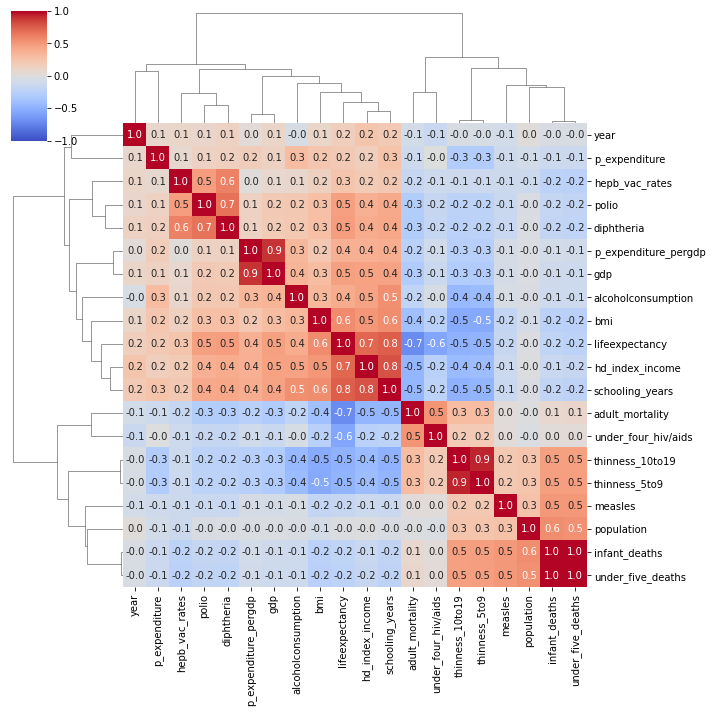

In [23]:
# clustermap : heatmap처럼 상관 관계를 색깔로 나타내며, 행열 별로 비슷한 항목들을 묶어줌
_ = sns.clustermap(data = corr,
                   annot = True, fmt = ',.1f',
                   cmap = 'coolwarm', 
                   vmin = -1, vmax = 1)

위 clustering 결과를 보면, heatmap을 보고 예상했던 것처럼<br>
- adult_mortality와 under_four_hiv/aids가 비슷한 그룹으로 분류되어 있고
- hepb_vac_rates, polio, diphtheria 등 질병 관련 feature가 비슷한 그룹으로 묶여있는 걸 확인할 수 있음

### 결측치 처리

#### hepb_vac_rates

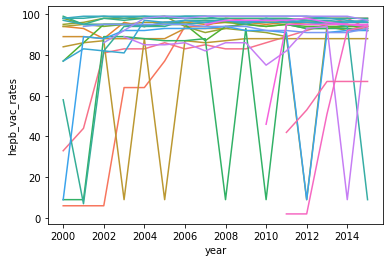

In [24]:
# 국가 별로 hepb_vac_rates 차이가 많이 있을까?
foo = data.loc[(data['nationstatus']=='Developed') & (data['hepb_vac_rates']>0), ['year', 'country', 'hepb_vac_rates']].groupby(by = ['year', 'country'], as_index = False)['hepb_vac_rates'].mean()
_ = sns.lineplot(data = foo, x = 'year', y = 'hepb_vac_rates', hue = 'country', legend = False)

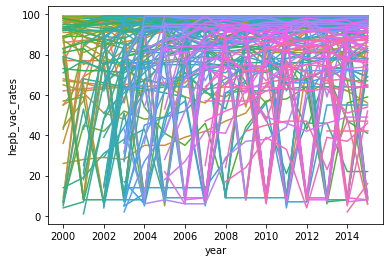

In [25]:
foo = data.loc[(data['nationstatus']=='Developing') & (data['hepb_vac_rates'].notnull()), ['year', 'country', 'hepb_vac_rates']].groupby(by = ['year', 'country'], as_index = False)['hepb_vac_rates'].mean()
_ = sns.lineplot(data = foo, x = 'year', y = 'hepb_vac_rates', hue = 'country', legend = False)

위 그래프를 보면, 이미 상당한 백신 접종율을 가지고 있던 나라들이 이상한 flunctuation을 갖는 걸 알 수 있음. <br>이건 실제로 백신 접종률이 매우 낮기 때문보다, 데이터 수집 과정에서 어떤 오류에 의한 것으로 판단됨<br>
따라서 선진국/개발도상국으로 나눠서 median값으로 결측치 -> 이상치 순으로 제거해주겠음

In [26]:
# 데이터 있는 애들 - nationstatus 별 기술통계
h_temp = data.loc[ (data['hepb_vac_rates']>0), ['nationstatus','year','hepb_vac_rates']]
df_median = pd.crosstab(index = h_temp.year, columns = h_temp.nationstatus, values = h_temp.hepb_vac_rates, aggfunc = 'median')
df_median.head(3)

nationstatus  Developed  Developing
year                               
2000           89.00000    89.00000
2001           91.00000    87.00000
2002           89.00000    88.00000

In [27]:
# 결측치부터 채워주기 - median
data.loc[ (data['nationstatus']=='Developed') & (data['hepb_vac_rates'].isnull()), 'hepb_vac_rates'] = data.loc[ (data['nationstatus']=='Developed') & 
                                                                                                                (data['hepb_vac_rates'].isnull()), 'year'].apply(lambda x : df_median.loc[x, 'Developed'])
data.loc[ (data['nationstatus']=='Developing') & (data['hepb_vac_rates'].isnull()), 'hepb_vac_rates'] = data.loc[ (data['nationstatus']=='Developing') & 
                                                                                                                (data['hepb_vac_rates'].isnull()), 'year'].apply(lambda x : df_median.loc[x, 'Developing'])
data['hepb_vac_rates'].isnull().sum()

0

In [28]:
# 각 연도, nationstatus 별 mean보다 낮은 수치는 이상치로 간주 > mean 값으로 대체
df_mean = pd.crosstab(index = h_temp.year, columns = h_temp.nationstatus, values = h_temp.hepb_vac_rates, aggfunc = 'mean')
mean_dev_ed = df_mean['Developed'].mean() # 87.7343
mean_dev_ing = df_mean['Developing'].mean() # 79.140045

In [29]:
# 이상치 제거
data.loc[ (data['nationstatus']=='Developed') & (data['hepb_vac_rates'] < mean_dev_ed), 'hepb_vac_rates'] = df_median['Developed'].mean()
data.loc[ (data['nationstatus']=='Developing') & (data['hepb_vac_rates'] < mean_dev_ing), 'hepb_vac_rates'] = df_median['Developing'].mean()


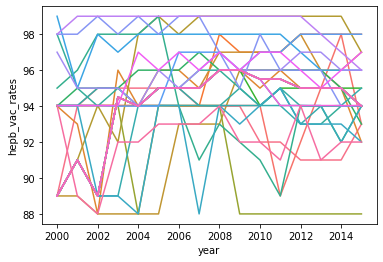

In [30]:
# 선진국 - 분포 재확인
foo = data.loc[(data['nationstatus']=='Developed'), ['year', 'country', 'hepb_vac_rates']].groupby(by = ['year', 'country'], as_index = False)['hepb_vac_rates'].mean()
_ = sns.lineplot(data = foo, x = 'year', y = 'hepb_vac_rates', hue = 'country', legend = False)

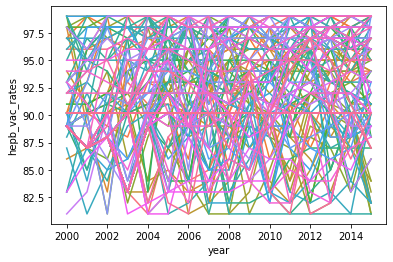

In [31]:
# 개발도상국 - 분포 재확인
foo = data.loc[(data['nationstatus']=='Developing'), ['year', 'country', 'hepb_vac_rates']].groupby(by = ['year', 'country'], as_index = False)['hepb_vac_rates'].mean()
_ = sns.lineplot(data = foo, x = 'year', y = 'hepb_vac_rates', hue = 'country', legend = False)

In [32]:
# 결측 데이터 - nationstatus 별 기술통계
data.groupby('nationstatus')['hepb_vac_rates'].describe()

count     mean     std      min      25%      50%      75%  \
nationstatus                                                                   
Developed     512.00000 94.46680 2.62085 88.00000 94.00000 95.00000 96.00000   
Developing   2416.00000 91.73019 4.54851 81.00000 89.00000 90.18750 96.00000   

                  max  
nationstatus           
Developed    99.00000  
Developing   99.00000

#### polio /diphteria

In [33]:
data[['nationstatus', 'polio', 'diphtheria', 'year']].describe()

polio  diphtheria       year
count 2909.00000  2909.00000 2928.00000
mean    82.54830    82.32142 2007.50000
std     23.41667    23.70664    4.61056
min      3.00000     2.00000 2000.00000
25%     78.00000    78.00000 2003.75000
50%     93.00000    93.00000 2007.50000
75%     97.00000    97.00000 2011.25000
max     99.00000    99.00000 2015.00000

In [34]:
data.loc[data['polio'].isnull(), ['nationstatus', 'polio', 'diphtheria', 'country', 'year']]

nationstatus  polio  diphtheria      country  year
1742   Developing    NaN         NaN   Montenegro  2005
1743   Developing    NaN         NaN   Montenegro  2004
1744   Developing    NaN         NaN   Montenegro  2003
1745   Developing    NaN         NaN   Montenegro  2002
1746   Developing    NaN         NaN   Montenegro  2001
1747   Developing    NaN         NaN   Montenegro  2000
2414   Developing    NaN         NaN  South Sudan  2010
2415   Developing    NaN         NaN  South Sudan  2009
2416   Developing    NaN         NaN  South Sudan  2008
2417   Developing    NaN         NaN  South Sudan  2007
2418   Developing    NaN         NaN  South Sudan  2006
2419   Developing    NaN         NaN  South Sudan  2005
2420   Developing    NaN         NaN  South Sudan  2004
2421   Developing    NaN         NaN  South Sudan  2003
2422   Developing    NaN         NaN  South Sudan  2002
2423   Developing    NaN         NaN  South Sudan  2001
2424   Developing    NaN         NaN  South Sudan  2000
2615   Developing    NaN         NaN  Timor-Leste  2001
2616   Developing    NaN         NaN  Timor-Leste  2000

In [35]:
# 데이터가 소수고, 추세를 파악하기 힘드므로 임의로 값을 지정해서 넣어줌 :)....:).....ㅎ...
data.loc[(data['country']=='Montenegro')& (data['year'].isin([2000, 2001,2002,2003,2004,2005,2006])), ['polio', 'diphtheria']] = 89.00000
data.loc[(data['country']=='South Sudan')& (data['year'].isin([2000, 2001,2002,2003,2004,2005])), 'polio'] = 55.00000
data.loc[(data['country']=='South Sudan')& (data['year'].isin([2006,2007,2008,2009,2010,2013])), 'polio'] = 61.00000
data.loc[(data['country']=='South Sudan')& (data['year'].isin([2000, 2001,2002,2003,2004,2005])), 'diphtheria'] = 41.00000
data.loc[(data['country']=='South Sudan')& (data['year'].isin([2006,2007,2008,2009,2010,2013])), 'diphtheria'] = 46.00000
data.loc[(data['country']=='Timor-Leste')& (data['year'].isin([2007])), ['polio', 'diphtheria']] = 70.00000
data.loc[(data['country']=='Timor-Leste')& (data['year'].isin([2000, 2001,2002])), 'polio'] = 51.00000
data.loc[(data['country']=='Timor-Leste')& (data['year'].isin([2000,2001,2002])), 'diphtheria'] = 52.00000


In [36]:
data[['polio', 'diphtheria']].isnull().sum()

polio         0
diphtheria    0
dtype: int64

#### schooling_years / hd_index_income

In [37]:
data.loc[data['schooling_years'].isnull(), ['schooling_years', 'hd_index_income']].isnull().sum()

schooling_years    160
hd_index_income    160
dtype: int64

In [38]:
# data.loc[data['schooling_years'].isnull(), ['year', 'country', 'nationstatus', 'schooling_years', 'hd_index_income']]
list_null_country = data.loc[data['schooling_years'].isnull(), 'country'].unique().tolist()
len(list_null_country)

10

얘네도 전년도 데이터가 누락됐네? <br>
위 clustermap에 따르면, hd_index_income, schooling_years가 가장 밀접한 연관을 갖는 feature는 이 두가지임.
- lifeexpectancy
- bmi <br>
그렇지만 아래에서 기대수명과 달리 bmi는 20%-80% 수준을 오가는, 이상 그래프를 보임<br>
따라서 기대수명 (그리고 필요하다면 2015년 bmi 데이터를) 기준으로 추정해봄 

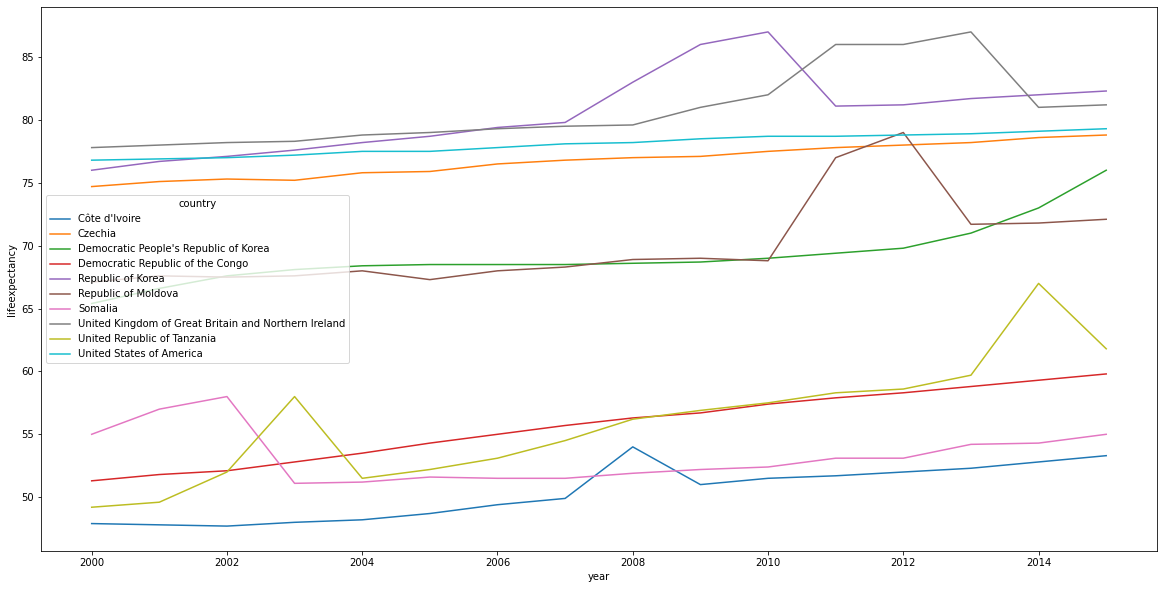

In [39]:
foo = data.loc[data['country'].isin(list_null_country), ['year', 'country', 'lifeexpectancy', 'bmi']]
plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = foo, x = 'year', y = 'lifeexpectancy', hue = 'country')


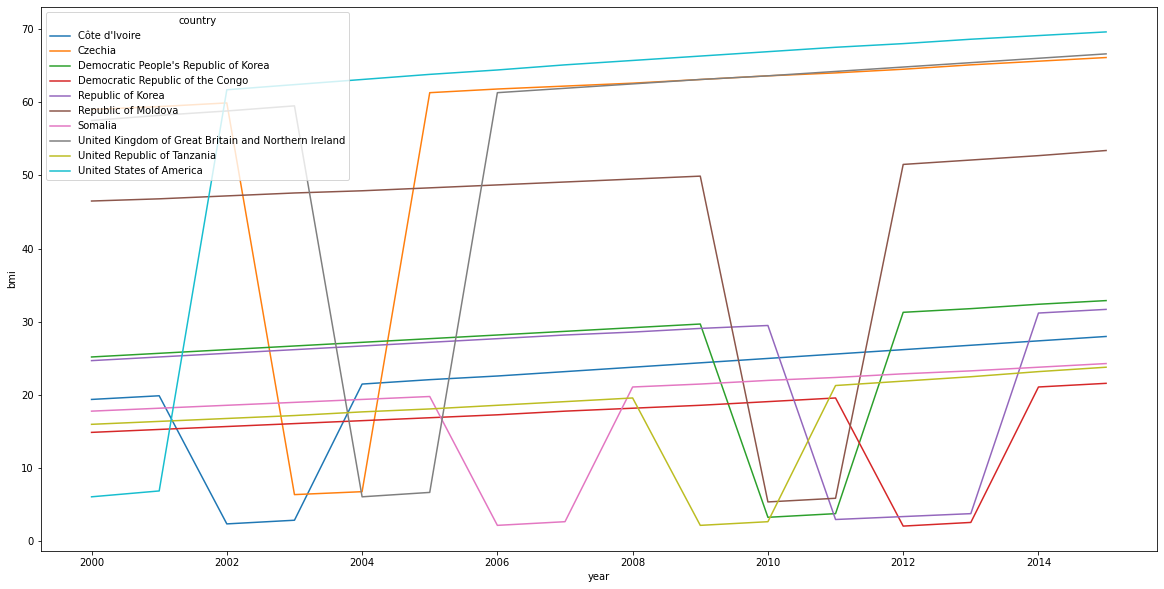

In [40]:
plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = foo, x = 'year', y = 'bmi', hue = 'country')

In [41]:
# year을 일단 구간으로 나눠주자
yr_range1 = [2000,2001,2002,2003,2004]
yr_range2 = [2005,2006,2007,2008,2009]
yr_range3 = [2010,2011,2012,2013,2014,2015]

data.loc[data['year'].isin(yr_range1), 'year_range'] = int(1)
data.loc[data['year'].isin(yr_range2), 'year_range'] = int(2)
data.loc[data['year'].isin(yr_range3), 'year_range'] = int(3)
data.head(3)

country  year nationstatus  lifeexpectancy  adult_mortality  \
0  Afghanistan  2015   Developing        65.00000        263.00000   
1  Afghanistan  2014   Developing        59.90000        271.00000   
2  Afghanistan  2013   Developing        59.90000        268.00000   

   infant_deaths  alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates  \
0             62             0.01000              71.27962        90.18750   
1             64             0.01000              73.52358        90.18750   
2             66             0.01000              73.21925        90.18750   

   measles  ...  p_expenditure  diphtheria  under_four_hiv/aids       gdp  \
0     1154  ...        8.16000    65.00000              0.10000 584.25922   
1      492  ...        8.18000    62.00000              0.10000 612.69653   
2      430  ...        8.13000    64.00000              0.10000 631.74500   

      population  thinness_10to19  thinness_5to9  hd_index_income  \
0 33736496.00000         17.20000       17.30000          0.47900   
1   327582.00000         17.50000       17.50000          0.47600   
2 31731688.00000         17.70000       17.70000          0.47000   

   schooling_years  year_range  
0         10.10000     3.00000  
1         10.00000     3.00000  
2          9.90000     3.00000  

[3 rows x 23 columns]

In [42]:
data['lifeexpectancy'].min(), data['lifeexpectancy'].max() 

(36.3, 89.0)

In [43]:
data.loc[(data['lifeexpectancy']<=40), 'lifeexp_range'] = int(0)
data.loc[(data['lifeexpectancy']>40)&(data['lifeexpectancy']<=45), 'lifeexp_range'] = int(1)
data.loc[(data['lifeexpectancy']>45)&(data['lifeexpectancy']<=50), 'lifeexp_range'] = int(2)
data.loc[(data['lifeexpectancy']>50)&(data['lifeexpectancy']<=55), 'lifeexp_range'] = int(3)
data.loc[(data['lifeexpectancy']>55)&(data['lifeexpectancy']<=60), 'lifeexp_range'] = int(4)
data.loc[(data['lifeexpectancy']>60)&(data['lifeexpectancy']<=65), 'lifeexp_range'] = int(5)
data.loc[(data['lifeexpectancy']>65)&(data['lifeexpectancy']<=70), 'lifeexp_range'] = int(6)
data.loc[(data['lifeexpectancy']>70)&(data['lifeexpectancy']<=75), 'lifeexp_range'] = int(7)
data.loc[(data['lifeexpectancy']>75)&(data['lifeexpectancy']<=80), 'lifeexp_range'] = int(8)
data.loc[(data['lifeexpectancy']>80)&(data['lifeexpectancy']<=85), 'lifeexp_range'] = int(9)
data.loc[(data['lifeexpectancy']>85), 'lifeexp_range'] = int(10)

exp_temp = data[['hd_index_income', 'lifeexp_range']].groupby('lifeexp_range', as_index = False)['hd_index_income'].mean()
exp_temp

lifeexp_range  hd_index_income
0         0.00000          0.38100
1         1.00000          0.38524
2         2.00000          0.36882
3         3.00000          0.36890
4         4.00000          0.42172
5         5.00000          0.47423
6         6.00000          0.58272
7         7.00000          0.67682
8         8.00000          0.78535
9         9.00000          0.89006
10       10.00000          0.88337

In [44]:
data.loc[(data['country'].isin(list_null_country)), 'hd_index_income'] = data.loc[(data['country'].isin(list_null_country)), 'lifeexp_range'].apply(lambda x : exp_temp.loc[x, 'hd_index_income'])
data.hd_index_income.isnull().sum()


0

In [45]:
exp_temp = data[['schooling_years', 'lifeexp_range']].groupby('lifeexp_range', as_index = False)['schooling_years'].mean()
exp_temp

data.loc[(data['country'].isin(list_null_country)), 'schooling_years'] = data.loc[(data['country'].isin(list_null_country)), 'lifeexp_range'].apply(lambda x : exp_temp.loc[x, 'schooling_years'])
data.schooling_years.isnull().sum()

0

#### thinness_10to19/thinness_5to9/bmi

In [46]:
data.loc[data['thinness_10to19'].isnull(), ['thinness_10to19', 'thinness_10to19', 'bmi']].sum()
# 세 컬럼이 같이 누락되었음을 알 수 있다

thinness_10to19   0.00000
thinness_10to19   0.00000
bmi               0.00000
dtype: float32

South Sudan, Sudan 데이터가 누락됨! <br>
문제는 2001-2015 전년도가 누락되어서, 참고할만한 샘플 데이터가 전혀 없다는 거. <br>
위에 상관관계 기준으로 clustermap 그렸을 때, bmi와 가장 밀접한 연관을 가지는 게 hd_index_income, schoolling_years임<br>
여기서 hd_index_income = (1/3)×(소득지수) + (1/3)×(기대수명지수) + (1/3)×(교육지수)<br>
즉, 기대수명, 소득, 교육 등 사회경제지수를 얼추 포함하고 있으므로, 얘를 통해 비슷한 수준의 국가를 가려낼 수 있다 가정하고 결측치를 채워줌! 

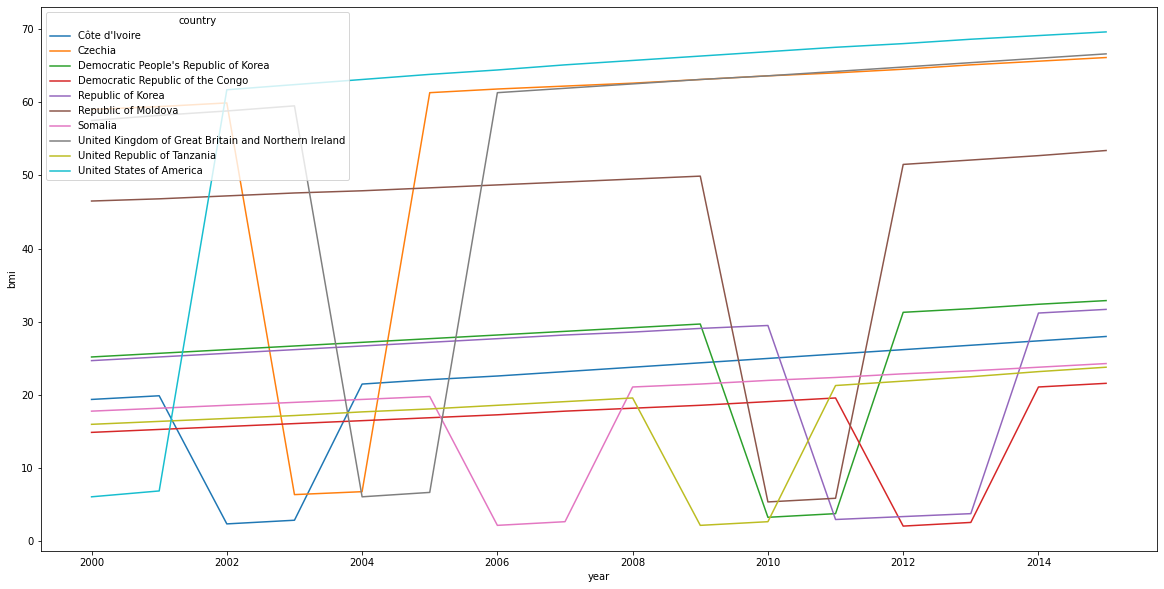

In [47]:
plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = foo, x = 'year', y = 'bmi', hue = 'country')

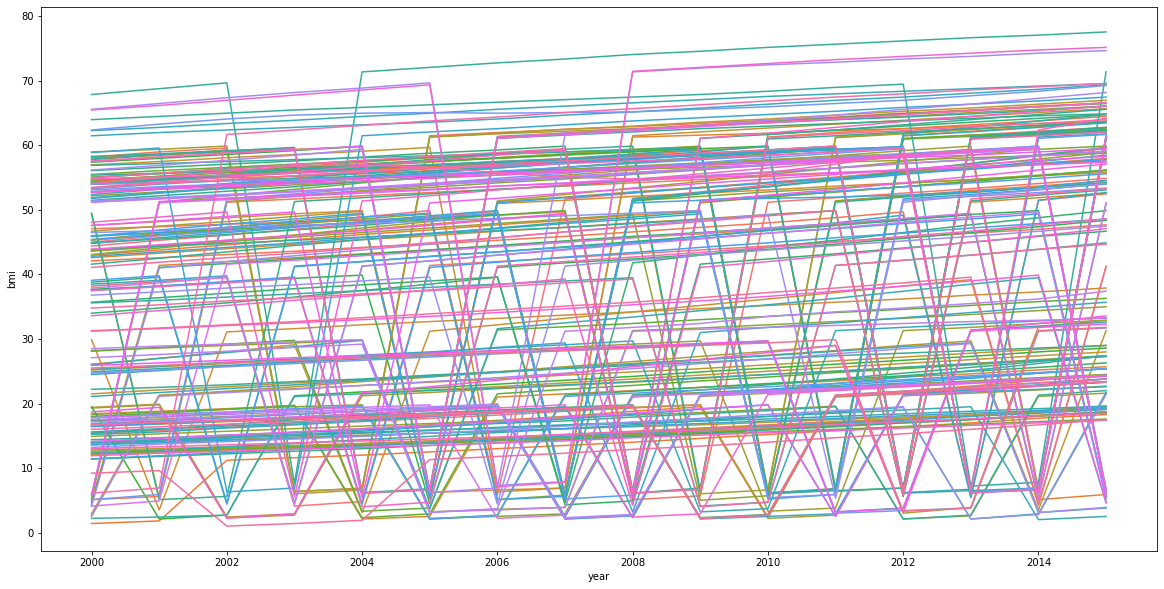

In [48]:
plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = data[['year', 'bmi', 'country']], x = 'year', y = 'bmi', hue = 'country', legend = False)

?... 이 데이터가 보이는 규칙적인 이상패턴의 정체는 뭘까. 일단 bmi 이상치부터 제거해줌

In [49]:
# 2000년대 데이터에 결측치 있는지 = 없음 > 얘를 기준치로 잡아서, 이 값보다 작은 애들은 이상치로 간주하고 yr_range 별 평균치로 대체해줄거임
data[(data['country']==2000) & (data['bmi'].isnull())].shape

(0, 24)

In [50]:
bar = data.loc[(data['year']==2000), ['country', 'bmi']]
bar.head(3)

country      bmi
15  Afghanistan 12.20000
31      Albania 45.00000
47      Algeria 44.40000

In [51]:
data[['country']].nunique() - pd.DataFrame(data.loc[data['year']==2000, 'country']).nunique()

country    0
dtype: int64

혹시라도 2001~2015년 데이터 중, 2000년 데이터가 없는 게 있는지 확인했으나 다행히 없음. 예정대로 진행함

In [52]:
b_temp = data[['country', 'year_range', 'bmi']]

b_cttemp = pd.crosstab( index = b_temp.country, columns = b_temp.year_range, values = b_temp.bmi, aggfunc = 'mean')
b_cttemp['country'] = b_cttemp.index
b_cttemp = pd.melt(b_cttemp, id_vars = 'country', )
b_cttemp.head(3)

country year_range    value
0  Afghanistan    1.00000 13.00000
1      Albania    1.00000 46.94000
2      Algeria    1.00000 46.14000

이상값 처리해주기에 앞서, 먼저 NaN값을 없애줘야 계산이 됨.<BR>
원본 데이터에 bmi >= 100인 샘플은 없음. 따라서 NaN값을 100으로 우선 채워준 후, 이상치 제거 > 결측치 처리 해줌

In [53]:
print(data.bmi.isnull().sum())
data['bmi'] = data['bmi'].fillna(100.0)
print(data.bmi.isnull().sum())

32
0


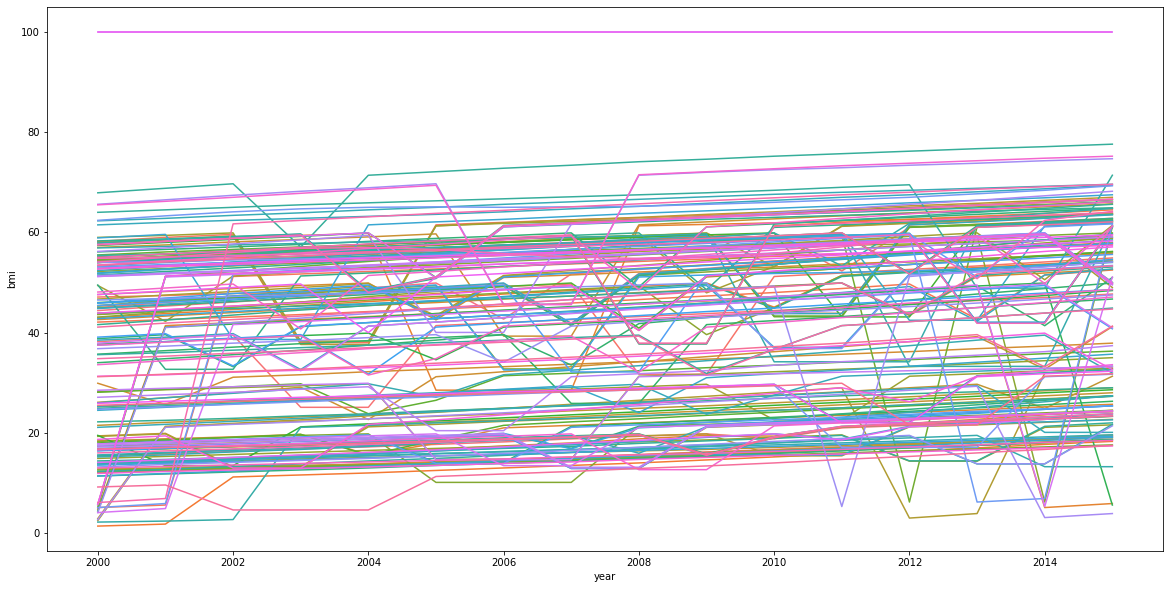

In [54]:
for index in range(data.shape[0]):
    country = data.iloc[index,0]
    yr_range = data.iloc[index,-2]
    bmi_lower_limit = float(bar.loc[bar['country'] == country, 'bmi'])
    bmi_revised = b_cttemp.loc[(b_cttemp['country'] == country) & (b_cttemp['year_range'] == yr_range), 'value']
    # bmi 기준 2000년도 값보다 낮으면, 이상치로 간주하고 bmi_revised로 바꿔줌
    if data.iloc[index, 10] < bmi_lower_limit :
        data.iloc[index, 10] = bmi_revised

plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = data, x = 'year', y = 'bmi', hue = 'country', legend = False)

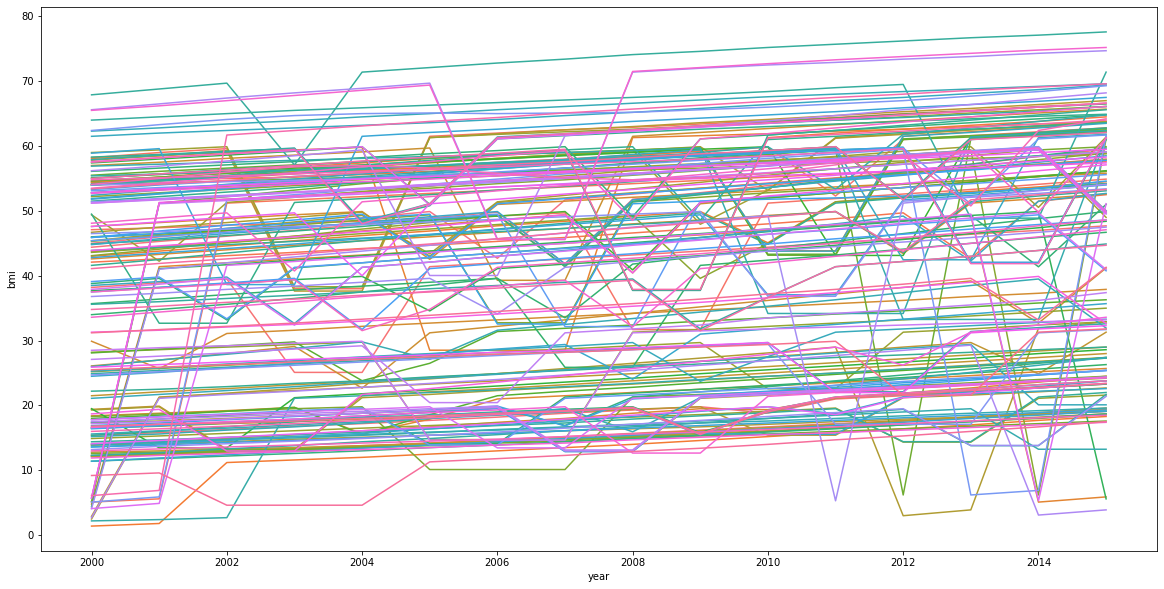

In [55]:
plt.figure(figsize = (20, 10))
_ = sns.lineplot(data = data[data['bmi']<100], x = 'year', y = 'bmi', hue = 'country', legend = False)

In [56]:
data.loc[data['bmi']==100, 'country'].unique()

array(['South Sudan', 'Sudan'], dtype=object)

In [57]:
 bmi_temp = data.loc[data['bmi']<100, ['bmi', 'country', 'lifeexp_range']].groupby(by=['country','lifeexp_range'], as_index = False)['bmi'].mean()
 bmi_temp.head(3)

country  lifeexp_range      bmi
0  Afghanistan        3.00000 12.20000
1  Afghanistan        4.00000 15.50000
2  Afghanistan        5.00000 19.10000

In [60]:
# data.loc[(data['bmi']==100), 'bmi'] = 
data.loc[(data['bmi']==100), ['country', 'lifeexp_range']].apply(lambda x :bmi_temp.loc[(bmi_temp['country']==x['country'])&(bmi_temp['lifeexp_range']==x['lifexp_range']),'bmi'])

data[data['bmi']==100]

KeyError: ignored

In [62]:
data.loc[data['thinness_10to19'].notnull(), 'hd_index_income'].describe()

count   2896.00000
mean       0.62977
std        0.20706
min        0.00000
25%        0.49300
50%        0.67700
75%        0.78400
max        0.94800
Name: hd_index_income, dtype: float64

In [64]:
# hd_index_income 검색 범위 : mean +- std :
print(0.62977-0.20706, 0.62977+0.20706)


0.42271000000000003 0.8368300000000001


#### alcoholconsumption

#### gdp

### 이상치 제거<br>
1. 0 ~ 25% - hepb_vac_rates / polio / diphtheria / schooling years
2. 75% ~ 100% : adult_mortality / infant_deaths / p_expenditure_pergdp / measles / under_five_deaths / gdp / population
3. p_expenditure_pergdp : GDP 대비 의료비 지출(%) - 퍼센트 비율인데 75% = 441.534144....? 물론 예상치 못한 이유로 GDP 이상으로 지출을 할 수도 있겠지, 라고 생각을 해보긴 했는데. 그래도 400%, 19500%는 뭔가 에러 혹은 이상치 영역이 맞는 듯
4. measles : 홍역, 인구 1000명당 보고된 환자 수 - 홍역은 재발하는 병이 아니라는데, 1000 이상의 값 조정

#### hepb_vac_rates

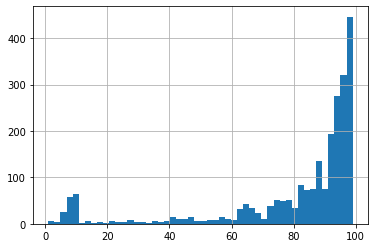

In [21]:
data['hepb_vac_rates'].hist(bins = 50)
# np.log1p를 취했을 때, 분포의 형태가 정규분포에 가깝게 변하지 않고, 그냥 scale만 변하는 걸 확인함
# 따라서 그냥 0~25% / 25~75% 구간으로 데이터를 나누어 보고, 필요할 경우 이상치 구간을 다른 데이터로 대체해줌
# min = 1.00 / 25% = 77.00 / 50% = 92.00 / 75% = 97.00 / max = 99.00

In [26]:
desc_hepb = data['hepb_vac_rates'].describe()
data.loc[data['hepb_vac_rates'] < desc_hepb['25%'], 'nationstatus'].value_counts()

count   2375.00000
mean      80.96084
std       25.01834
min        1.00000
25%       77.00000
50%       92.00000
75%       97.00000
max       99.00000
Name: hepb_vac_rates, dtype: float64

In [28]:
data.loc[data['nationstatus']=='Developed', 'hepb_vac_rates'].describe()

count   339.00000
mean     88.04130
std      20.48924
min       2.00000
25%      89.00000
50%      95.00000
75%      97.00000
max      99.00000
Name: hepb_vac_rates, dtype: float64

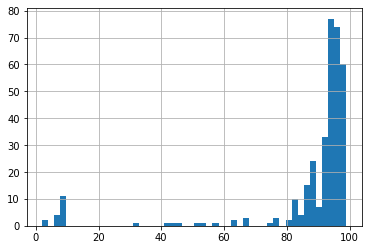

In [29]:
data.loc[data['nationstatus']=='Developed', 'hepb_vac_rates'].hist(bins = 50)

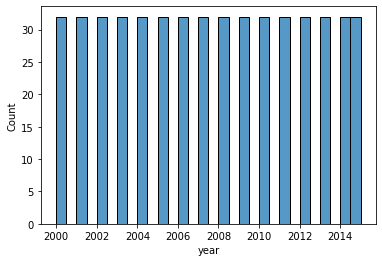

In [75]:
_ = sns.histplot(data= data.loc[data['nationstatus']=='Developed'], x = 'year', bins = 30 )

In [44]:
# hepb 백신 접종률 1사분위 미만 - 연도 별 평균 국가 수 
data.loc[(data['nationstatus']=='Developed') & (data['hepb_vac_rates'] < 89.00000), ['year','country']].value_counts().sum()/data.loc[(data['nationstatus']=='Developed') & (data['hepb_vac_rates'] < 89.00000), 'year'].nunique()

5.0

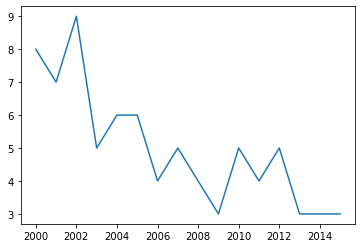

In [34]:
# 연도 별 상세 분포
data.loc[(data['nationstatus']=='Developed') & (data['hepb_vac_rates'] < 89.00000), 'year'].value_counts().sort_index().plot()

In [43]:
# hepb 백신 접종률 1사분위 이상 - 연도 별 평균 국가 수 
data.loc[(data['nationstatus']=='Developed') & (data['hepb_vac_rates'] >= 89.00000), ['year','country']].value_counts().sum()/data.loc[(data['nationstatus']=='Developed') & (data['hepb_vac_rates'] >= 89.00000), 'year'].nunique()

16.1875

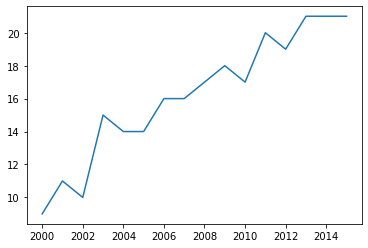

In [35]:
data.loc[(data['nationstatus']=='Developed') & (data['hepb_vac_rates'] >= 89.00000), 'year'].value_counts().sort_index().plot()

결론 : 선진국의 경우 25% 미만 값을 갖는 나라가, 연도 별 평균 5개국임

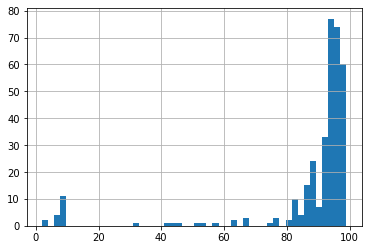

In [22]:
data.loc[data['nationstatus']=='Developed', 'hepb_vac_rates'].hist(bins = 50)

Developing    555
Developed      30
Name: nationstatus, dtype: int64

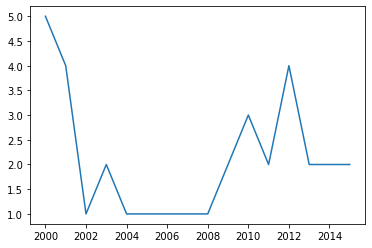

In [132]:
# hepb 백신접종률 77%(1사분위) 미만 - 선진국 샘플 수 
data.loc[(data['hepb_vac_rates'] < desc_hepb['25%']) & (data['nationstatus']=='Developed'), 'year'].value_counts().sort_index().plot()

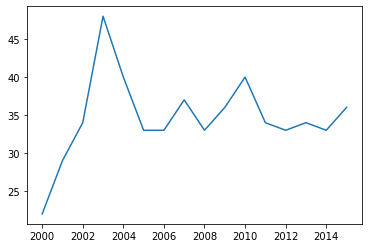

In [130]:
# hepb 백신접종률 77%(1사분위) 미만 - 개발도상국 샘플 수 
data.loc[(data['hepb_vac_rates'] < desc_hepb['25%']) & (data['nationstatus']=='Developing'), 'year'].value_counts().sort_index().plot()

In [142]:
replace_developing = data.loc[(data['hepb_vac_rates'] < desc_hepb['25%']) & (data['nationstatus']=='Developing'), 'hepb_vac_rates'].mean()
replace_developed = data.loc[(data['hepb_vac_rates'] < desc_hepb['25%']) & (data['nationstatus']=='Developed'), 'hepb_vac_rates'].mean()

In [143]:
data.loc[(data['hepb_vac_rates'] < desc_hepb['25%']) & (data['nationstatus']=='Developing'), 'hepb_vac_rates'] = replace_developing
data.loc[(data['hepb_vac_rates'] < desc_hepb['25%']) & (data['nationstatus']=='Developed'), 'hepb_vac_rates'] = replace_developed

In [144]:
data['hepb_vac_rates'].describe()

count   2375.00000
mean      80.96084
std       21.35931
min       28.63333
25%       77.00000
50%       92.00000
75%       97.00000
max       99.00000
Name: hepb_vac_rates, dtype: float64

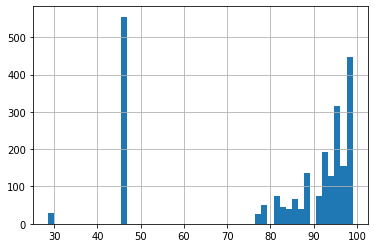

In [147]:
(data['hepb_vac_rates']).hist(bins = 50)

In [148]:
data.loc[(data['hepb_vac_rates'] == replace_developing) & (data['nationstatus']=='Developing'), 'year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=uint16)

In [152]:
data.loc[(data['hepb_vac_rates'] == replace_developed) & (data['nationstatus']=='Developed'), 'year'].unique()

array([2001, 2000, 2004, 2003, 2002, 2005, 2010, 2012, 2014, 2013, 2011,
       2008, 2015], dtype=uint16)

#### polio / diphteria

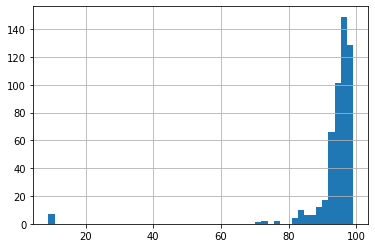

In [153]:
data.loc[(data['nationstatus']=='Developed'),'polio'].hist(bins = 50)

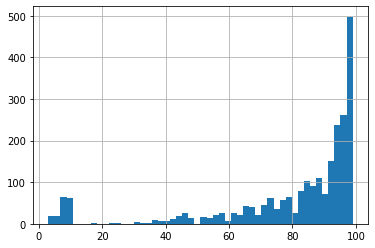

In [154]:
data.loc[(data['nationstatus']=='Developing'),'polio'].hist(bins = 50)

#### scatterplot / lmplot

In [21]:
data.sample(2)

country  year nationstatus  lifeexpectancy  adult_mortality  \
614    Congo  2009   Developing        68.00000        314.00000   
2008    Peru  2014   Developing        75.30000        125.00000   

      infant_deaths  alcoholconsumption  p_expenditure_pergdp  hepb_vac_rates  \
614               7             3.47000               0.00000        75.00000   
2008              8             0.01000             973.72870        88.00000   

      measles  ...    polio  p_expenditure  diphtheria  under_four_hiv/aids  \
614         1  ... 76.00000        2.27000    78.00000              4.00000   
2008        0  ... 78.00000        5.47000    88.00000              0.10000   

            gdp    population  thinness_10to19  thinness_5to9  \
614         NaN           NaN          8.30000        7.90000   
2008 6491.52441 3973354.00000          1.10000        1.10000   

      hd_index_income  schooling_years  
614           0.54500         10.30000  
2008          0.73500         13.40000  

[2 rows x 22 columns]

아래 국가 상태에 따른, 기대수명 추이에 관한 산점도와 기술통계를 보면, <br>
1. 기대수명과 선진국/개발도상국 구분은 의미가 있음
2. 근데 개발도상국의 경우 (gdp를 제외한 모든 feature(사망률/gdp/교육수준)에서 선진국 대비 표준편차가 큼 <br>
따라서 대륙 구분 등 개발도상국 내에서 클래스를 나누는 게 필요할 것 같음

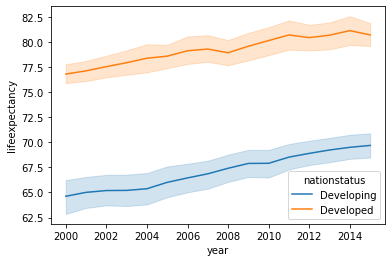

In [51]:
# 선진국/개발도상국 - nationstatus 구분에 따라 기대수명에 명확한 차이가 존재
_ = sns.lineplot(data = data, x = 'year', y = 'lifeexpectancy',hue = 'nationstatus' )

In [71]:
data.groupby(by = 'nationstatus', as_index = False)[['lifeexpectancy', 'adult_mortality', 'infant_deaths', 'gdp', 'schooling_years']].describe().rename({0:'Developed', 1:'Developing'}).T

Developed  Developing
lifeexpectancy  count    512.00000  2416.00000
                mean      79.19785    67.11147
                std        3.93094     9.00609
                min       69.90000    36.30000
                25%       76.80000    61.10000
                50%       79.25000    69.00000
                75%       81.70000    74.00000
                max       89.00000    89.00000
adult_mortality count    512.00000  2416.00000
                mean      79.68555   182.83319
                std       47.87758   127.97456
                min        1.00000     1.00000
                25%       58.00000    92.00000
                50%       73.00000   163.00000
                75%       96.00000   253.00000
                max      229.00000   723.00000
infant_deaths   count    512.00000  2416.00000
                mean       1.49414    36.53477
                std        4.58577   129.18789
                min        0.00000     0.00000
                25%        0.00000     1.00000
                50%        0.00000     6.00000
                75%        1.00000    28.00000
                max       28.00000  1800.00000
gdp             count    448.00000  2037.00000
                mean   22053.38672  4292.19287
                std    22870.82812  8782.21094
                min       12.27733     1.68135
                25%     3875.74097   382.54993
                50%    13560.72363  1244.42944
                75%    36760.42578  4153.49805
                max   119172.74219 88564.82031
schooling_years count    464.00000  2304.00000
                mean      15.84547    11.22513
                std        1.76680     3.04094
                min       11.50000     0.00000
                25%       14.70000     9.60000
                50%       15.80000    11.70000
                75%       16.80000    13.20000
                max       20.70000    18.30000

성인 사망률과 기대수명은 눈에 띄는 음의 상관관계를 가짐<br>
이 때, 개발도상국/선진국 할 것 없이 회귀선이 크게 두 개로 나누어지는 걸 볼 수 있음<br>
회귀선1, 회귀선2를 이루는 데이터 간에는 무슨 차이가 있는지 알아보자

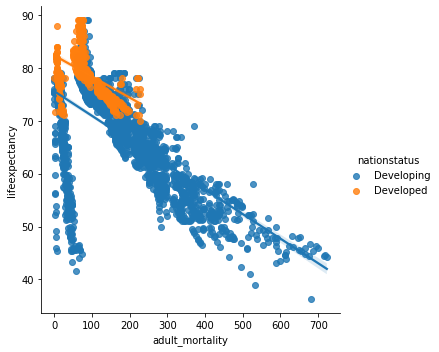

In [22]:
_ = sns.lmplot(data = data, x= 'adult_mortality', y = 'lifeexpectancy', hue = 'nationstatus')

In [96]:
# lifeexpectancy = 60 기준, 데이터 살펴보기
df_under60 = data[(data['lifeexpectancy'] <= 60) ]
df_over60 = data[(data['lifeexpectancy'] > 60) ]
df_under60.shape, df_over60.shape

((594, 23), (2334, 23))

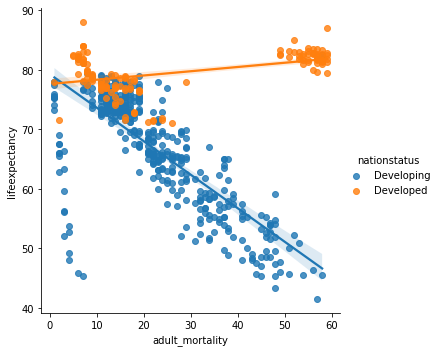

In [82]:
_ = sns.lmplot(data = data[ (data['adult_mortality']<=60) ], 
               x= 'adult_mortality', y = 'lifeexpectancy', hue = 'nationstatus')

In [25]:
data.loc[ (data['adult_mortality']<=60), 'adult_mor_class'] = int(1)
data['adult_mor_class'] = data['adult_mor_class'].fillna(2).astype(int)
data['adult_mor_class'].value_counts()

2    2367
1     561
Name: adult_mor_class, dtype: int64

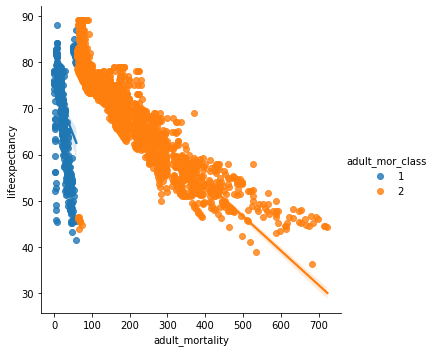

In [26]:
_ = sns.lmplot(data = data, x= 'adult_mortality', y = 'lifeexpectancy', hue = 'adult_mor_class')

##### 성인 사망률 - 기대수명 : 두 개의 회귀선으로 나누어지는 경향이 보임<br>
그래서 adult_mor_class에 따라, 다른 feature들이 다른 경향을 가지는지 보려 산점도를 그려 봄<br>
결론 = class 1, 2에 관계없이 다른 feature는 대체로 비슷한 경향을 보임


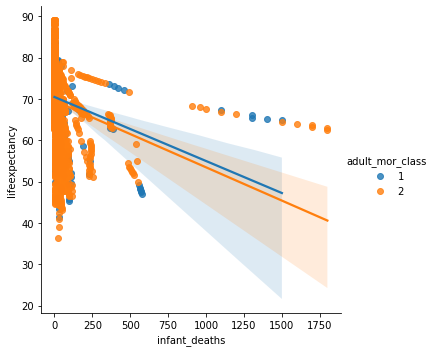

In [27]:
_ = sns.lmplot(data = data, x= 'infant_deaths', y = 'lifeexpectancy', hue = 'adult_mor_class')

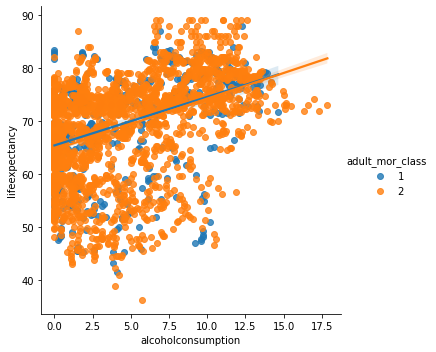

In [29]:
_ = sns.lmplot(data = data, x= 'alcoholconsumption', y = 'lifeexpectancy', hue = 'adult_mor_class')

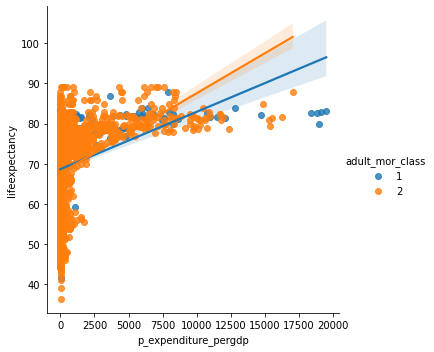

In [30]:
_ = sns.lmplot(data = data, x= 'p_expenditure_pergdp', y = 'lifeexpectancy', hue = 'adult_mor_class')

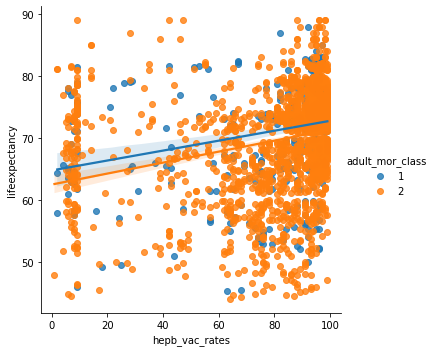

In [31]:
_ = sns.lmplot(data = data, x= 'hepb_vac_rates', y = 'lifeexpectancy', hue = 'adult_mor_class')

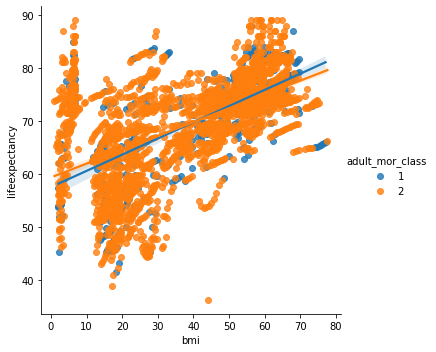

In [33]:
_ = sns.lmplot(data = data, x= 'bmi', y = 'lifeexpectancy', hue = 'adult_mor_class')

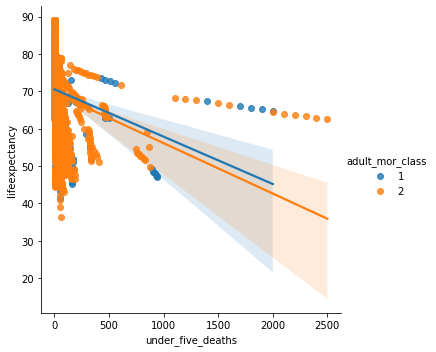

In [34]:
_ = sns.lmplot(data = data, x= 'under_five_deaths', y = 'lifeexpectancy', hue = 'adult_mor_class')

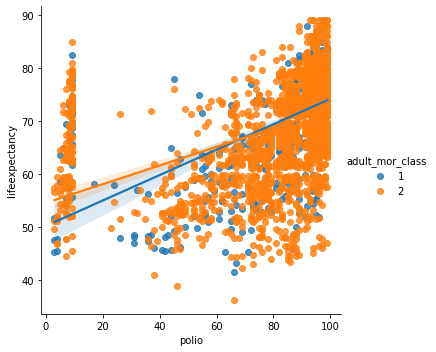

In [35]:
_ = sns.lmplot(data = data, x= 'polio', y = 'lifeexpectancy', hue = 'adult_mor_class')

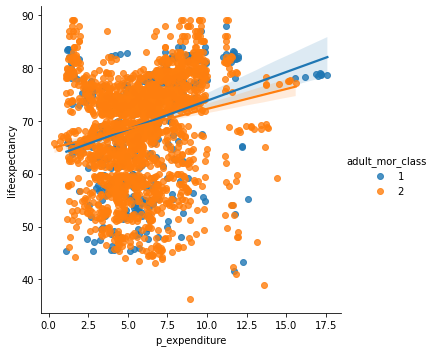

In [36]:
_ = sns.lmplot(data = data, x= 'p_expenditure', y = 'lifeexpectancy', hue = 'adult_mor_class')

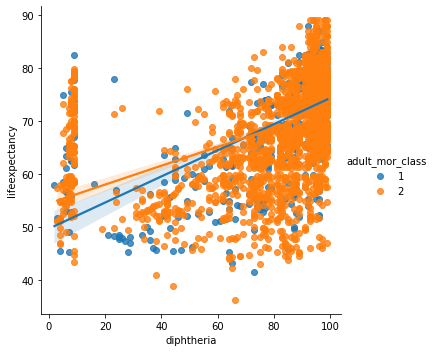

In [37]:
_ = sns.lmplot(data = data, x= 'diphtheria', y = 'lifeexpectancy', hue = 'adult_mor_class')

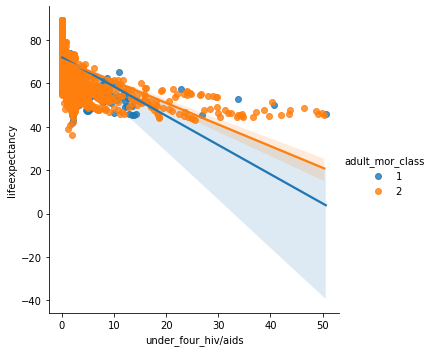

In [38]:

_ = sns.lmplot(data = data, x= 'under_four_hiv/aids', y = 'lifeexpectancy', hue = 'adult_mor_class')

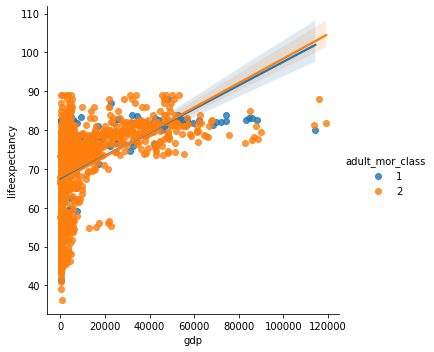

In [39]:
_ = sns.lmplot(data = data, x= 'gdp', y = 'lifeexpectancy', hue = 'adult_mor_class')

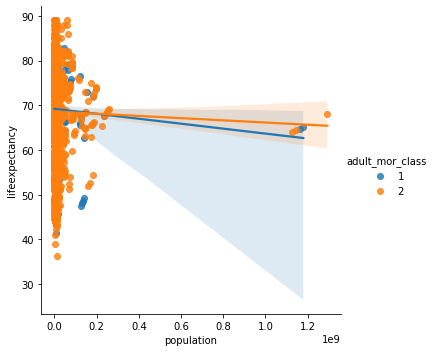

In [40]:
_ = sns.lmplot(data = data, x= 'population', y = 'lifeexpectancy', hue = 'adult_mor_class')

In [41]:
_ = sns.lmplot(data = data, x= 'thinness_10to19', y = 'lifeexpectancy', hue = 'adult_mor_class')

In [42]:
_ = sns.lmplot(data = data, x= 'thinness_5to9', y = 'lifeexpectancy', hue = 'adult_mor_class')

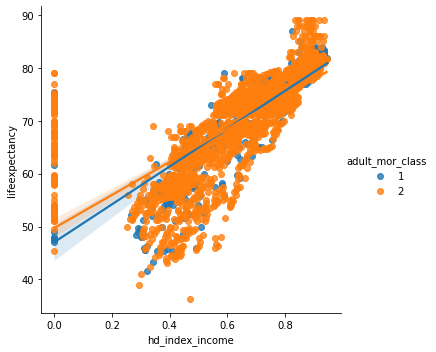

In [44]:
_ = sns.lmplot(data = data, x= 'hd_index_income', y = 'lifeexpectancy', hue = 'adult_mor_class')

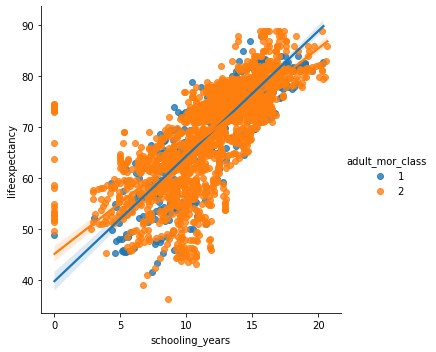

In [43]:
_ = sns.lmplot(data = data, x= 'schooling_years', y = 'lifeexpectancy', hue = 'adult_mor_class')

### Feature engineering
    1. 중요한 변수 선정
    2. 필요없는 변수 삭제
    3. 결측치 채우기
    4. 파생변수 생성
    5. 필요없는 변수 최종 삭제 

#### 1. 중요한 변수 선정

#### 2. 필요없는 변수 삭제

#### 3. 결측치 채우기

In [67]:
data.isnull().sum()[data.isnull().sum()>0]

alcoholconsumption    193
hepb_vac_rates        553
bmi                    32
polio                  19
p_expenditure         226
diphtheria             19
gdp                   443
population            644
thinness_10to19        32
thinness_5to9          32
hd_index_income       160
schooling_years       160
dtype: int64

In [ ]:
# alcoholconsumption

In [ ]:
# schooling_years       

#### 4. 파생변수 생성

In [ ]:
# 국가 - 대륙 매칭

In [ ]:
# population은 별 의미가 없지만, 인구 밀도는 영향을 줄 수 있지 않을까? 
# 국가 별 size를 불러와서 매칭해주자 
# 1) data['country_size']
# 2) data['pop_density'] = data['population']/data['country_size']

In [ ]:
# year을 그대로 쓰지 말고, 5년 단위로 grouping
# [참고 : GDP와 기대수명 사이 관계 - 프레스턴 커브](https://brunch.co.kr/@kuy06154/46)

In [ ]:
# 따라서 hep_vac_rates를 직접 활용하기보다는, 이런 백신 관련 지표들을 묶어서 '질병 예방에 대한 노력' column을 점수화하고 (1,2,3점 등 Ordinal하게) 얘는 삭제해주기로 함

#### 5. 필요없는 변수 최종 삭제 

In [ ]:
# 국가 데이터 삭제

In [ ]:
# 따라서 hep_vac_rates를 직접 활용하기보다는, 이런 백신 관련 지표들을 묶어서 '질병 예방에 대한 노력' column을 점수화하고 (1,2,3점 등 Ordinal하게) 얘는 삭제해주기로 함

## Case2. 평향된 분포 log1p 취할 경우

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f227a785c90>,
      dtype=object)

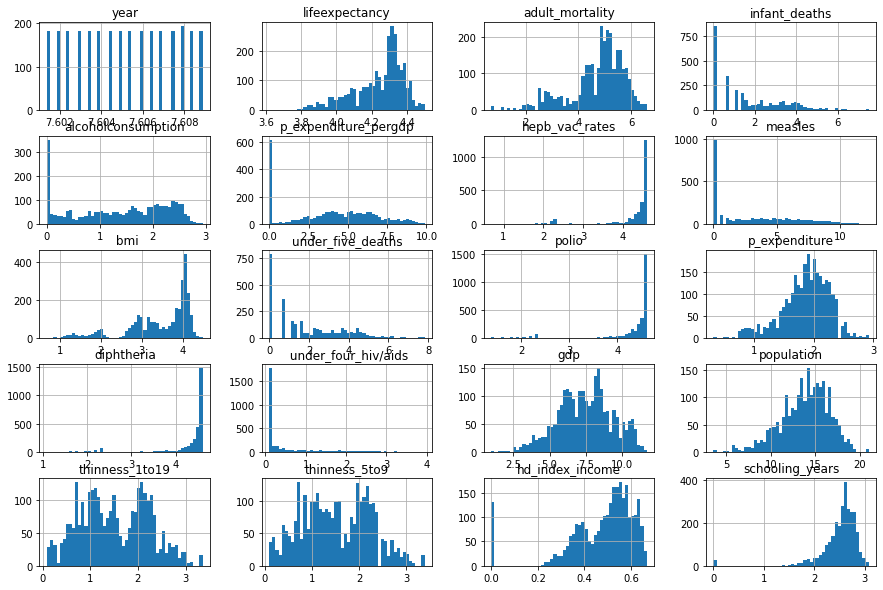

In [ ]:
temp = data.copy()
num_cols = temp.select_dtypes('number').columns.tolist()
for col in num_cols :
    temp[col] = np.log1p(temp[col])

temp.hist(figsize = (15,10), bins = 50)